# Importing Libraries and Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading Dataset

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: C:\Users\Dell\netflix.csv

  0%|          | 0.00/3.40M [00:00<?, ?B/s]
 15%|#5        | 524k/3.40M [00:00<00:01, 1.57MB/s]
 46%|####6     | 1.57M/3.40M [00:00<00:00, 3.09MB/s]
 77%|#######7  | 2.62M/3.40M [00:00<00:00, 4.34MB/s]
100%|##########| 3.40M/3.40M [00:00<00:00, 4.24MB/s]


# 1. Defining Problem Statement and Analysing basic metrics (10 Points)
Given the data of Netflix from 1925 to 2021

We are provided various details in the given data set. As show_id, title, cast, directors, ratings, listed_in, date_added, description, release_year,duration, country and type. we need to do the Analysis of the given data explanatory and exploratory both ways and then find out the insights.

For working with this we need to read the csv file so pandas will be imported.

to show the insights visually so to plot graph we import matplotlib.pyplot and seaborn.

Now Analysing the basic metrics of the given dataset.

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

# Inspecting the DataFrame

In [3]:
netflix_data = pd.read_csv("C:/Users/Dell/netflix.csv")
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Let's look at the datatype and the number of non-null values in the netflix dataframe

In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


So the following columns have null values in the dataset:

director: 2634 null values

cast: 825 null values

country: 931 null values

date_added: 10 null values

rating: 4 null values

duration: 3 null values

Data Preprocessing
Unique Values in each column

Identify which columns in the dataframe can be used as unique identifier for each row

In [5]:
for i in netflix_data.columns:
  print(f'{i} has {netflix_data[i].nunique()} unique values')

show_id has 8807 unique values
type has 2 unique values
title has 8807 unique values
director has 4528 unique values
cast has 7692 unique values
country has 748 unique values
date_added has 1767 unique values
release_year has 74 unique values
rating has 17 unique values
duration has 220 unique values
listed_in has 514 unique values
description has 8775 unique values


So, show_id and title are unique identifiers of any row in the dataset.

# Replacement/Imputation of Null Values

We can replace null values in director, cast, country, date_added columns with 'unknown' as null values for director, cast and country columns are difficult to impute.

Null Values for rating and duration require further inspection before we can replace/impute null values in those columns.

In [6]:
netflix_data['director'].fillna("unknown",inplace = True) 

In [7]:
netflix_data['cast'].fillna("unknown",inplace = True) 

In [8]:
netflix_data['country'].fillna("unknown",inplace = True) 

In [9]:
netflix_data['date_added'].fillna("unknown",inplace = True) 

In [10]:
netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In info we see duration , rating these features have negligible missing values as 3 and 4 
respectively so just simply drop these records

In [11]:
netflix_data.dropna(subset = ['duration','rating'], inplace  = True)

Using date_added feature which is string so convert it to date type first and then extracting 
month and year in seperate columns

In [12]:
netflix_data['date_add']=pd.to_datetime(netflix_data['date_added'], errors='coerce')

netflix_data['month']=netflix_data['date_add'].dt.month.fillna(-1)

netflix_data['month']=netflix_data['month'].astype('int64')

In [13]:
netflix_data['year']=netflix_data['date_add'].dt.year.fillna(-1)

netflix_data['year']=netflix_data['year'].astype('int64')

# Got some more Numerical data from date_added and added new_features as month, year in dataset

# 3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

In [14]:
for i in range(netflix_data.shape[1]):
    print(netflix_data.iloc[:,i].value_counts())
    print('..............................................................................................................')
    print()

s1       1
s5873    1
s5867    1
s5868    1
s5869    1
        ..
s2928    1
s2927    1
s2926    1
s2925    1
s8807    1
Name: show_id, Length: 8800, dtype: int64
..............................................................................................................

Movie      6126
TV Show    2674
Name: type, dtype: int64
..............................................................................................................

Dick Johnson Is Dead                      1
Ricardo O'Farrill Abrazo Genial           1
Cooked                                    1
Care Bears & Cousins                      1
Hannibal Buress: Comedy Camisado          1
                                         ..
Captain Underpants Epic Choice-o-Rama     1
We Bare Bears                             1
To All the Boys: P.S. I Still Love You    1
French Toast                              1
Zubaan                                    1
Name: title, Length: 8800, dtype: int64
................................

# Insight
Here we can see
Movies 6126 far more than TV shows 2674
All different title and show id .
Maximum of data of about 2815 movies/TV shows of only United States whereas India on 2nd rank with 972 count.
Maximum movies/Tv shows relaeased in 2018 that is 1147 count
TV-MA rating is the highest 3207 and then TV-14 2160
Mostly TV shows liked are of 1 season and movies around 90 min is the standard people expect.
Dramas , International Movies, Documentaries are most favourite among netflix audience.

In [15]:
for i in range(netflix_data.shape[1]):
    print(netflix_data.iloc[:,i].value_counts(normalize = True)*100)
    print('..............................................................................................................')
    print()

s1       0.011364
s5873    0.011364
s5867    0.011364
s5868    0.011364
s5869    0.011364
           ...   
s2928    0.011364
s2927    0.011364
s2926    0.011364
s2925    0.011364
s8807    0.011364
Name: show_id, Length: 8800, dtype: float64
..............................................................................................................

Movie      69.613636
TV Show    30.386364
Name: type, dtype: float64
..............................................................................................................

Dick Johnson Is Dead                      0.011364
Ricardo O'Farrill Abrazo Genial           0.011364
Cooked                                    0.011364
Care Bears & Cousins                      0.011364
Hannibal Buress: Comedy Camisado          0.011364
                                            ...   
Captain Underpants Epic Choice-o-Rama     0.011364
We Bare Bears                             0.011364
To All the Boys: P.S. I Still Love You    0.011364
French

# Insight
To observe the percentwise data I normalise it.
It shows Netflix has around 70-30 distribution amongst Movies and TV show.
Out of which the most is under United States around 32% and on 2nd rank India is contributing around 11%
More than 50% data is added which is released in the years 2016 to 2020
Around 60% population is Mature and Teenagers audience contributing 36.44 TV-MA rating and 24.54 TV-14 rating
Other attributes already mentiones above.

In [16]:

for i in range(netflix_data.shape[1]):
    print(pd.unique(netflix_data.iloc[:,i]))
    print('..............................................................................................................')
    print()

['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
..............................................................................................................

['Movie' 'TV Show']
..............................................................................................................

['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
..............................................................................................................

['Kirsten Johnson' 'unknown' 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
..............................................................................................................

['unknown'
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, 

# insight
All unique values are printed of each attribute in the above for loop

In [17]:
netflix_data.nunique()

show_id         8800
type               2
title           8800
director        4527
cast            7689
country          749
date_added      1766
release_year      74
rating            14
duration         220
listed_in        514
description     8768
date_add        1713
month             13
year              15
dtype: int64

# insight
This count of unique printed for each attribute gives the clarification about
Only 2 type of data i.e. Movie and TV Show -------------Type 2
show_id, title are all unique. Can be treated as primary key-------------show_id, title 8800
Distributed over 749 counties all aroun the world ----------------------country 749
This is data from about 74 years--------------------------year 74
Diffren type of rating criterias are

# Let's look at movies and tv shows released per year over the last 20-30 years

Creating separate dataframes - netflix_movies and netflix_tvshows to analyse the data related to movies and tv shows separately


In [18]:
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']
netflix_tvshows = netflix_data[netflix_data['type'] == 'TV Show']
     

In [19]:
netflix_tvshows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_add,month,year
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9,2021
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,9,2021
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,9,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018-05-01,5,2018
8796,s8797,TV Show,Yunus Emre,unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017-01-17,1,2017
8797,s8798,TV Show,Zak Storm,unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018-09-13,9,2018
8800,s8801,TV Show,Zindagi Gulzar Hai,unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016-12-15,12,2016


# How has the number of movies released per year changed over the last 20-30 years?

In [20]:
result = netflix_data["release_year"].value_counts()

In [21]:
df1 = result.to_frame()

In [22]:
df1.to_csv("result.csv")

# If we see in the result.csv file. We have data from 1925 to 2021 i.e. almost about 100 years. The number of movies released per year goes on increasing every year.


# Business Insight: The dataset has more Movies (6126) as compared to TV shows (2674)

# Insight = Movies present on netflix_data are approximately double than the TV Show.

<AxesSubplot:xlabel='type', ylabel='count'>

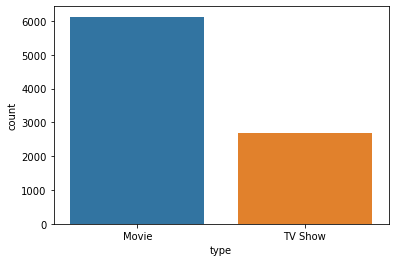

In [23]:
type = sns.countplot(data=netflix_data,x=netflix_data["type"],order=netflix_data["type"].value_counts().index)
type

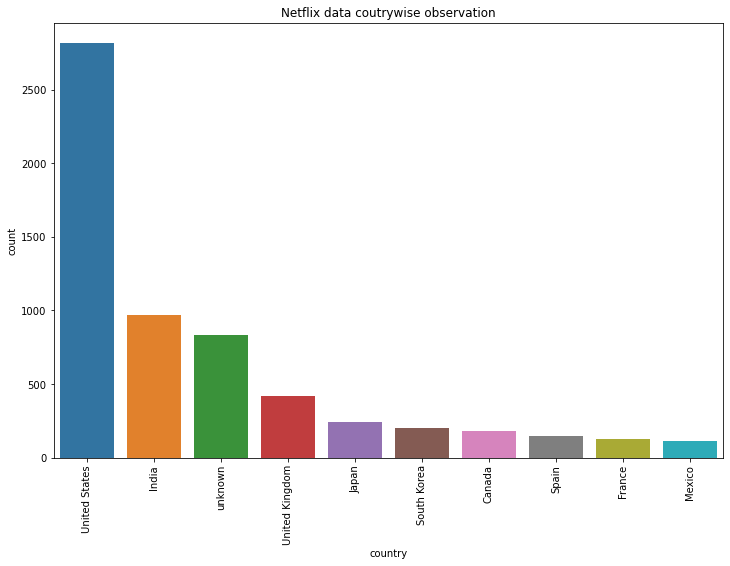

In [24]:
plt.figure(figsize = (12,8))
plt.title("Netflix data coutrywise observation")
Country = sns.countplot(x = netflix_data['country'],order = netflix_data.country.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
Country
plt.show()

# Insight = India has the 2 highest rank followed by United States in Given Netflix dataset. 

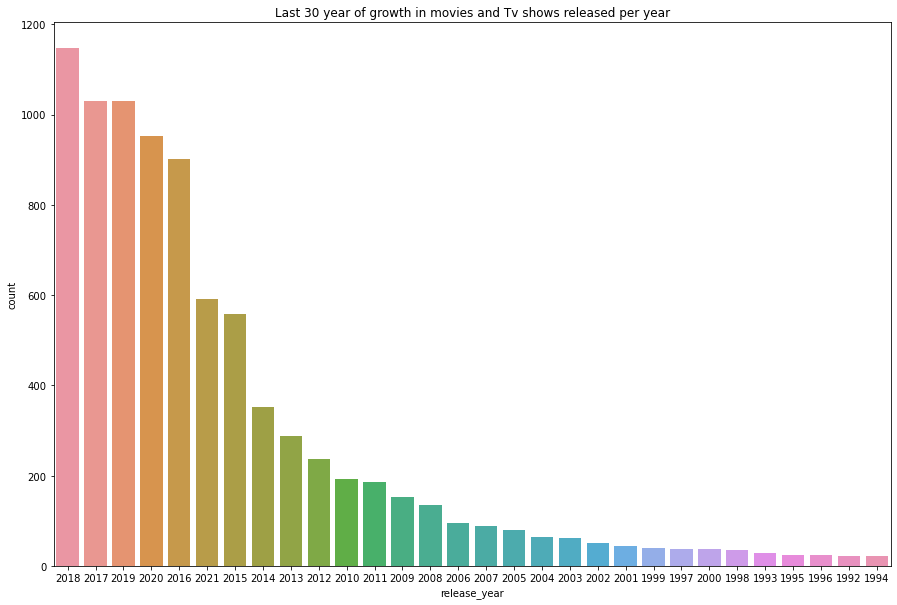

In [25]:
plt.figure(figsize = (15,10))
plt.title("Last 30 year of growth in movies and Tv shows released per year")
release_year_head30 = sns.countplot(data=netflix_data,x=netflix_data["release_year"],order=netflix_data["release_year"].value_counts().head(30).index)
release_year_head30
plt.show()

# Insight = As we can see from this countplot that count of movie released per year goes on increasing year by year in recent years last 20 to 30 But last 10 year showed the exponential growth all of a sudden.

In [26]:
#netflix_data

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

# Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

In [27]:
netflix_data_expanded = netflix_data
#netflix_data_expanded

# In preprocessing the word unnesting means to seperate data. As I observed cast and listed in these 2 features we are having entries as comma seperated values so with the command explode I just 
seperate those values each as a different record.

In [28]:
netflix_data_expanded['cast'] = netflix_data_expanded['cast'].str.split(",")

In [29]:
netflix_data_expanded= netflix_data_expanded.explode(column='cast')

In [30]:
netflix_data_expanded['listed_in'] = netflix_data_expanded['listed_in'].str.split(",")

In [31]:
netflix_data_expanded = netflix_data_expanded.explode(column='listed_in')

In [32]:
netflix_data_expanded.reset_index(drop = True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_add,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,2021
1,s2,TV Show,Blood & Water,unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,9,2021
2,s2,TV Show,Blood & Water,unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021-09-24,9,2021
3,s2,TV Show,Blood & Water,unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021-09-24,9,2021
4,s2,TV Show,Blood & Water,unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021-09-24,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149437,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02,3,2019
149438,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,2019-03-02,3,2019
149439,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019-03-02,3,2019
149440,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019-03-02,3,2019


Univariate Analysis =
###Category = count, bar, pie ###Numeric = hist,KDE, bar

Comparison of tv shows vs. movies.¶

# Creating separate dataframes - netflix_movies and netflix_tvshows to analyse the data related to movies and tv shows separately

In [33]:
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']
netflix_tvshows = netflix_data[netflix_data['type'] == 'TV Show']

In [34]:
#netflix_tvshows

# Counting the number of Movies and TV Shows released every year

In [35]:
movie_count = netflix_movies['release_year'].value_counts()
tvshows_count = netflix_tvshows['release_year'].value_counts()
movie_count.sort_index(inplace = True)
tvshows_count.sort_index(inplace = True)

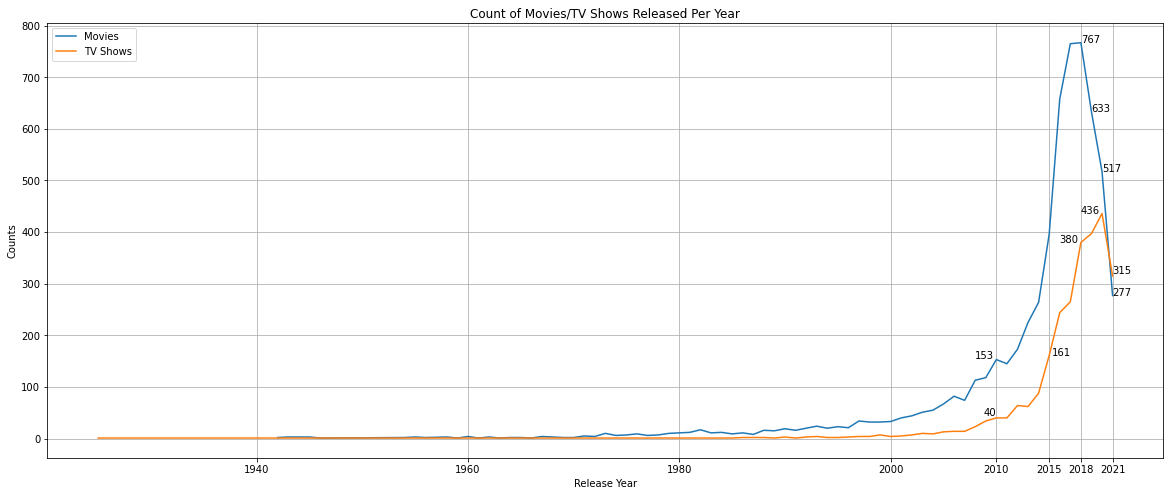

In [36]:
plt.figure(figsize=(20,8))
plt.plot(movie_count.index,movie_count.values)
plt.plot(tvshows_count.index, tvshows_count.values)
plt.xlabel('Release Year')
plt.ylabel('Counts')
plt.title('Count of Movies/TV Shows Released Per Year')
plt.text(2008,155,movie_count[2010])
plt.text(2018,movie_count[2018],movie_count[2018])
plt.text(2019,movie_count[2019],movie_count[2019])
plt.text(2020,movie_count[2020],movie_count[2020])
plt.text(2021,movie_count[2021],movie_count[2021])
plt.text(2008.8,45,tvshows_count[2010])
plt.text(2015.3,tvshows_count[2015],tvshows_count[2015])
plt.text(2016,380,tvshows_count[2018])
plt.text(2018,tvshows_count[2020],tvshows_count[2020])
plt.text(2021,320,tvshows_count[2021])
plt.xticks([1940, 1960, 1980, 2000, 2010, 2015, 2018, 2021])
plt.legend(["Movies","TV Shows"])
plt.grid()
plt.show()
     

# Business Insight from the plot - Movies Released Per Year (See Above Figure)
The growth of movies and TV show is similar from 1940 till 2015 but after that sudden peak in growth in movie there is a sharp hike but at 2017 there is a sharp decrease in movies.

The orange line of TV shows is growing parallely but at 2021 it is intersecting to the blue line of movies. That means in 2021 TV shows are becoming equivalent to Movies according to population interest.


In [37]:
#netflix_data_expanded

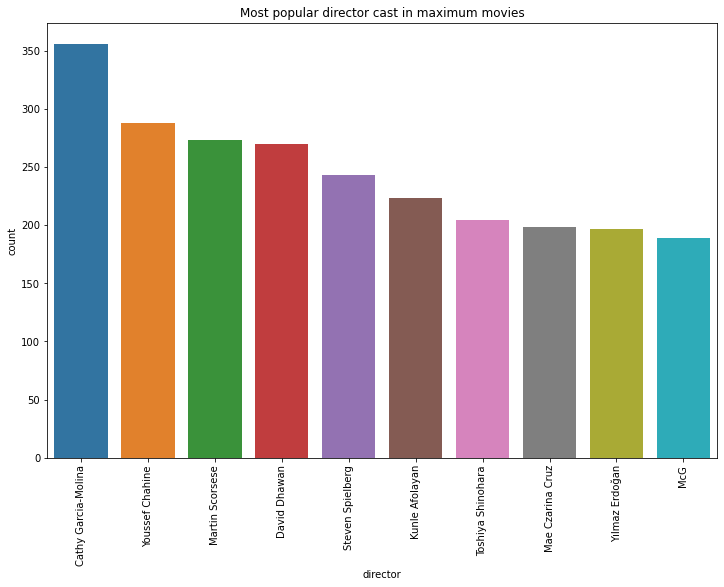

In [38]:
plt.figure(figsize = (12,8))
plt.title("Most popular director cast in maximum movies")
Director = sns.countplot(data = netflix_data_expanded[(netflix_data_expanded['director'] != 'unknown') & (netflix_data_expanded['type'] == 'Movie')], 
              x = 'director', 
              order = netflix_data_expanded[(netflix_data_expanded['director'] != 'unknown') & (netflix_data_expanded['type'] == 'Movie')]['director'].value_counts().index[:10])
Director
plt.xticks(rotation = 90)
plt.show()

# Insight : Cathy Garcia Molina directed maximum movies that is around 350.

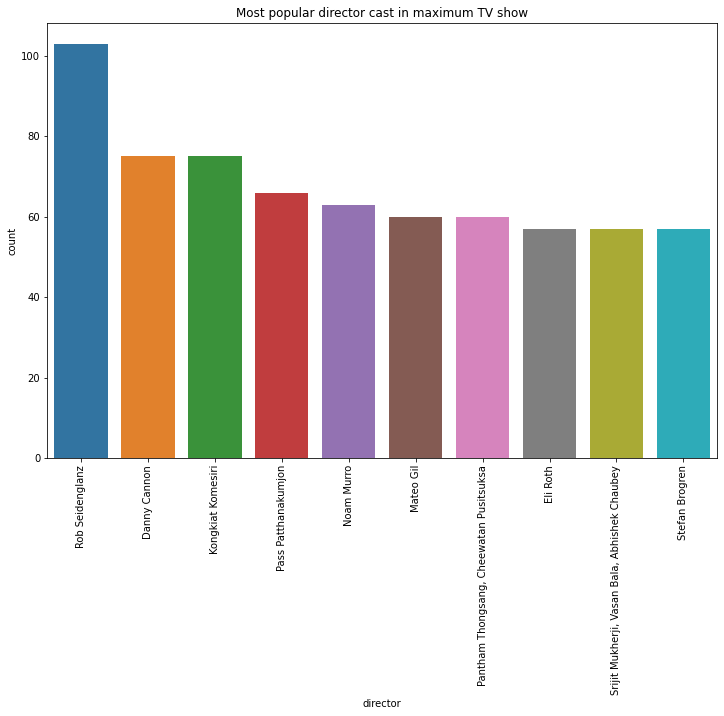

In [39]:
plt.figure(figsize = (12,8))
plt.title("Most popular director cast in maximum TV show")
Director = sns.countplot(data = netflix_data_expanded[(netflix_data_expanded['director'] != 'unknown') & (netflix_data_expanded['type'] == 'TV Show')], 
              x = 'director', 
              order = netflix_data_expanded[(netflix_data_expanded['director'] != 'unknown') & (netflix_data_expanded['type'] == 'TV Show')]['director'].value_counts().index[:10])
Director
plt.xticks(rotation = 90)
plt.show()

# Insight : Rob Seidenglanz directed maximum TV Shows that is around more than 100.

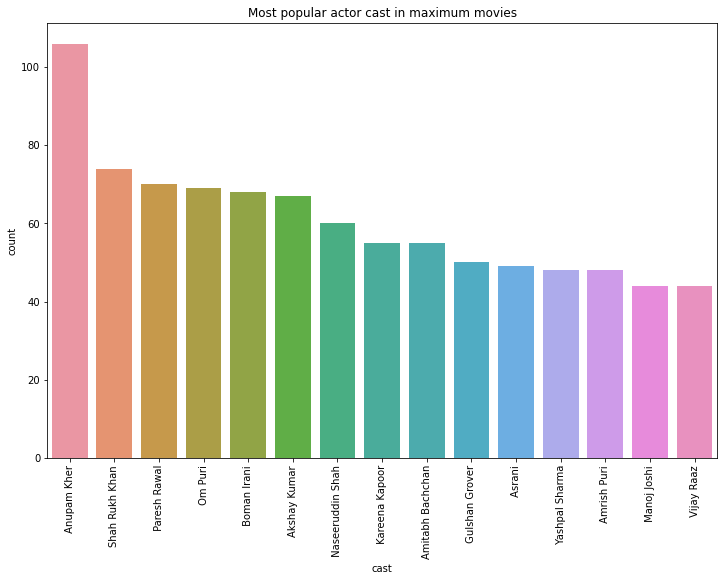

In [40]:
plt.figure(figsize = (12,8))
plt.title("Most popular actor cast in maximum movies")
Actor = sns.countplot(data = netflix_data_expanded[(netflix_data_expanded['cast'] != 'unknown') & (netflix_data_expanded['type'] == 'Movie')], 
              x = 'cast', 
              order = netflix_data_expanded[(netflix_data_expanded['cast'] != 'unknown') & (netflix_data_expanded['type'] == 'Movie')]['cast'].value_counts().index[:15])
Actor
plt.xticks(rotation = 90)
plt.show()

# Insight : Anupam kher is been casted in maximum movies/Tv shows that is around more than 100. As we can see most of the top 15 actors are well known names of bollywood stars. So Indian actors are popular worldwide.

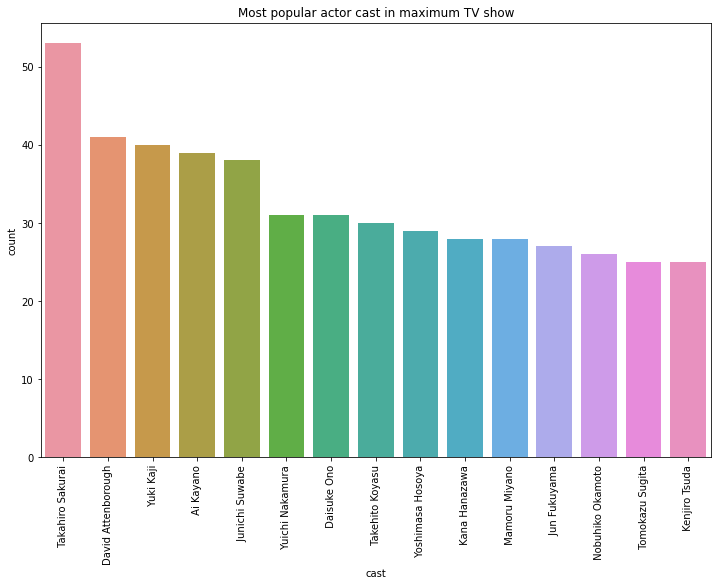

In [41]:
plt.figure(figsize = (12,8))
plt.title("Most popular actor cast in maximum TV show")
Actor = sns.countplot(data = netflix_data_expanded[(netflix_data_expanded['cast'] != 'unknown') & (netflix_data_expanded['type'] == 'TV Show')], 
              x = 'cast', 
              order = netflix_data_expanded[(netflix_data_expanded['cast'] != 'unknown') & (netflix_data_expanded['type'] == 'TV Show')]['cast'].value_counts().index[:15])
Actor
plt.xticks(rotation = 90)
plt.show()

# As most of the TV Show cast is not Indian rather it seems Japanese/chinese. The most favourite among all is Takahiro Sakhurai have acted in more than 50 TV shows

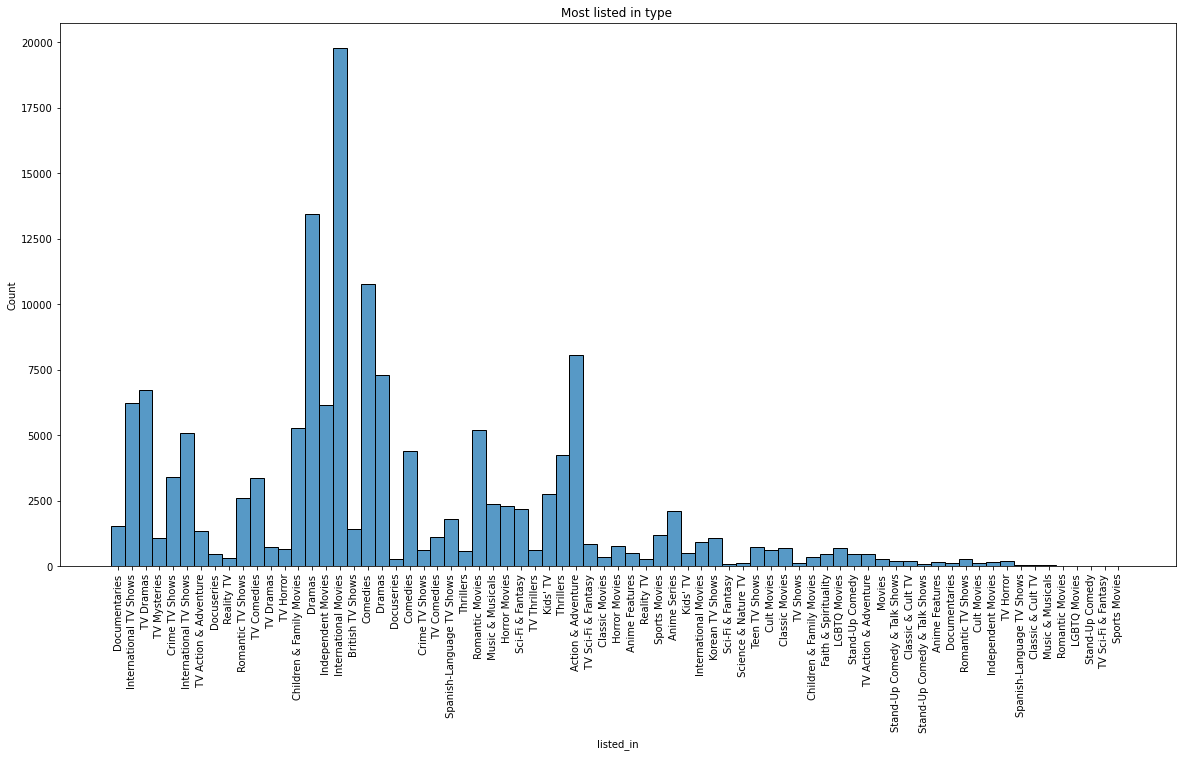

In [42]:
plt.figure(figsize = (20,10))
plt.title("Most listed in type ")
sns.histplot(netflix_data_expanded['listed_in'])
plt.xticks(rotation = 90)
plt.show()

# Insight : The most favourite Genre which is listed in is International Movies. Dramas and comedies are some more favourites following it.

In [43]:
#BOXPLOT/ Distplot

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


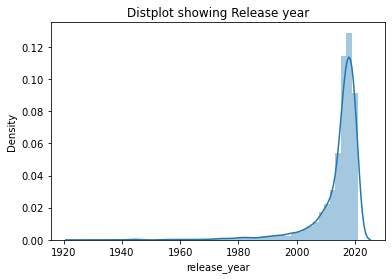

In [44]:
plt.title("Distplot showing Release year")
sns.distplot(netflix_data["release_year"])
plt.show()

# Insight: Maximum movies and TV Shows are released after 2000 till 2020

<AxesSubplot:xlabel='release_year'>

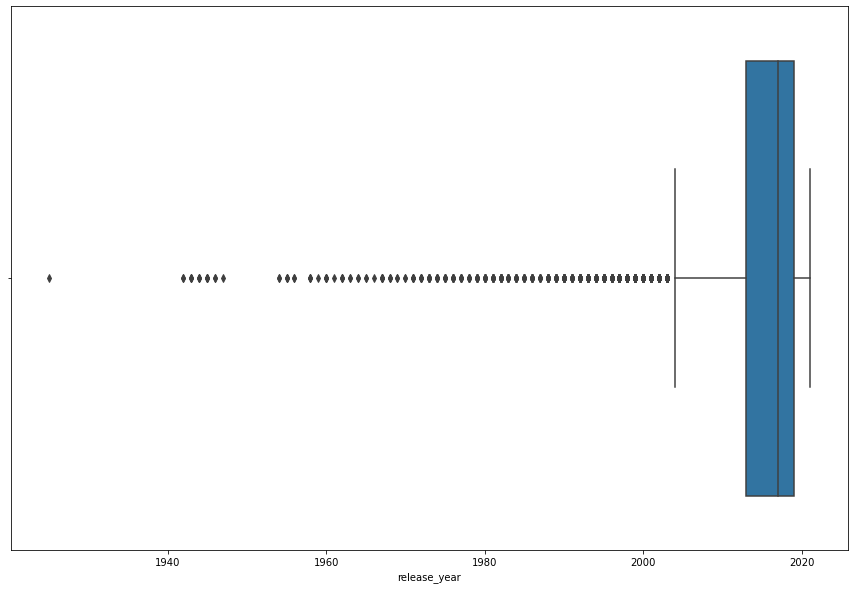

In [45]:
plt.figure(figsize = (15,10))
sns.boxplot(data = netflix_data, x = 'release_year')

# Before year 2000 the dots shown are considered as outliers. As most of the netflix data belong to the years between 2010 to 2020

The below graph represents the correlation of type movies and TV Shows with release yearr and year on which it is added on the netflix

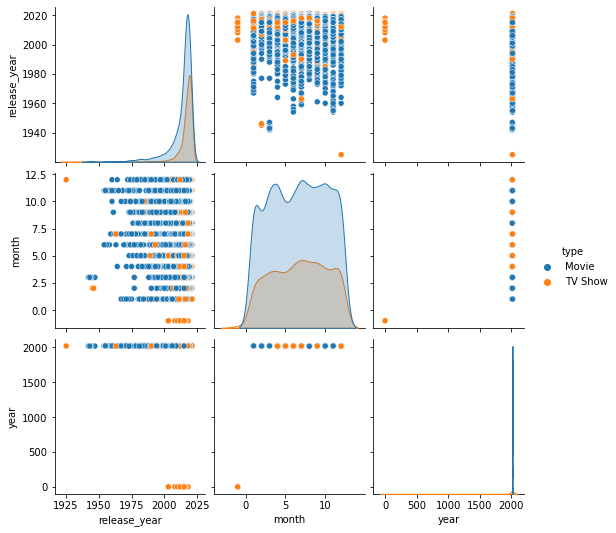

In [46]:
sns.pairplot(netflix_data, hue = 'type')

# Analysing Content Rating for Netflix in Different Countries

In [47]:
# Expanding Rows which have more than one Country entry

expanded_country_list = netflix_data['country'].apply(lambda x : str(x).split(',')).tolist()
netflix_country_list = pd.DataFrame(expanded_country_list, index = netflix_data['title'])
netflix_country_list = netflix_country_list.stack()
netflix_country_list = pd.DataFrame(netflix_country_list.reset_index())
netflix_country_list.drop(['level_1'], axis = 1, inplace = True)
netflix_country_list.rename(columns = {0:'Country'}, inplace = True)
netflix_country_expanded = netflix_country_list.merge(netflix_data[['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']], on = ['title'], how = 'left')
netflix_country_expanded['Country'] = netflix_country_expanded['Country'].str.strip()
netflix_country_count = netflix_country_expanded['Country'].value_counts()
     

In [48]:
# Creating a DataFrame of Top 10 Countries with most content on Netflix

netflix_country_top10 = netflix_country_expanded[netflix_country_expanded['Country'].isin(list(netflix_country_count.index)[:11])]
netflix_country_top10 = netflix_country_top10[['Country','rating']]
netflix_country_top10['Count'] = 1

In [49]:
# Creating a Pivot of Rating Count vs Top 10 Country with most content on Netflix

df=netflix_country_top10.pivot_table(index="Country",
                     columns="rating",
                     aggfunc=["count"],
                     fill_value=0)

column_names = []

for x in df.columns:
  column_names.append(x[2])

df.columns = column_names
df = df.loc[['United States',
 'India',
 'unknown',
 'United Kingdom',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico']]

# Business Insight (See Figure Below : Top 10 Countries vs Content Ratings of Movies)
United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, and Germany are the top 10 countries with the most amount of movie content on Netflix.

United States, United Kingdom, Canada, and France have a large content of Movies/TV Shows which require parental guidance for people with age less than 14 years as shown numbers under PG(parental Guidance) and PG-13

In comparison, India, Japan, Spain, South Korea, Germany, and Mexico have relatively less content on Netflix for such rated Movies or TV Shows.

The content of movies for people age more than 17 or mature audiences are fairly distributed amongst these top 10 countries.

The rating TV-14 and TV-MA can be seen equally fairly distributed all among the top 10 movies


<AxesSubplot:title={'center':'Top 10 Countries vs Content Ratings of Movies'}, ylabel='Country'>

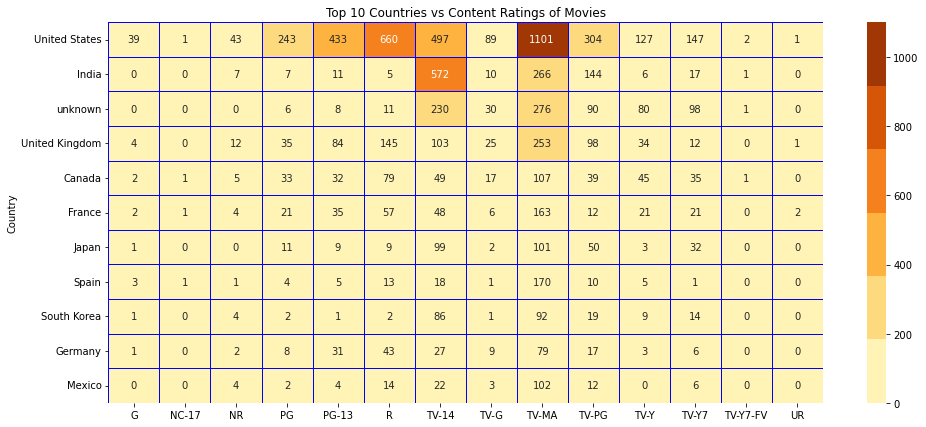

In [50]:
# Creating a Heatmap of Top 10 Country with most content on Netflix vs Count of Rating

colormap = sns.color_palette("YlOrBr")
plt.figure(figsize=(16,7))
plt.title('Top 10 Countries vs Content Ratings of Movies')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='blue', cmap=colormap)

# Recommendation:

In india netflix is seen by mostly teaan agers and having max 572 value as a rating for TV-14 

In United states ratings PG, PG-13, TV-14,TV-MA, R etc have the scope but in india if we observe TV-14 and TV-MA movies have more scope

Content for the mature audience is something that can be produced irrespective of country or location as 1101 is the count of TV -MA rating which is the maximum amongst all.

In [51]:
# Creating a Pivot of Rating Count vs Bottom 40 Country with most content on Netflix

netflix_country_bottom40 = netflix_country_expanded[netflix_country_expanded['Country'].isin(list(netflix_country_count.index)[-40:])]
netflix_country_bottom40 = netflix_country_bottom40[['Country','rating']]
netflix_country_bottom40['Count'] = 1
df=netflix_country_bottom40.pivot_table(index="rating",
                     columns="Country",
                     aggfunc=["count"],
                     fill_value=0)
     

In [52]:
column_names = []

for x in df.columns:
  column_names.append(x[2])

df.columns = column_names

# Business Insight (See Figure Below: Bottom 40 Countries vs Content Ratings of Movies')
Below are the list of countries that have 1 or 2 content on Netflix

A Large number of these countries have content for a mature audience that is Rathing TV-MA

<AxesSubplot:title={'center':'Bottom 40 Countries vs Content Ratings of Movies'}, ylabel='rating'>

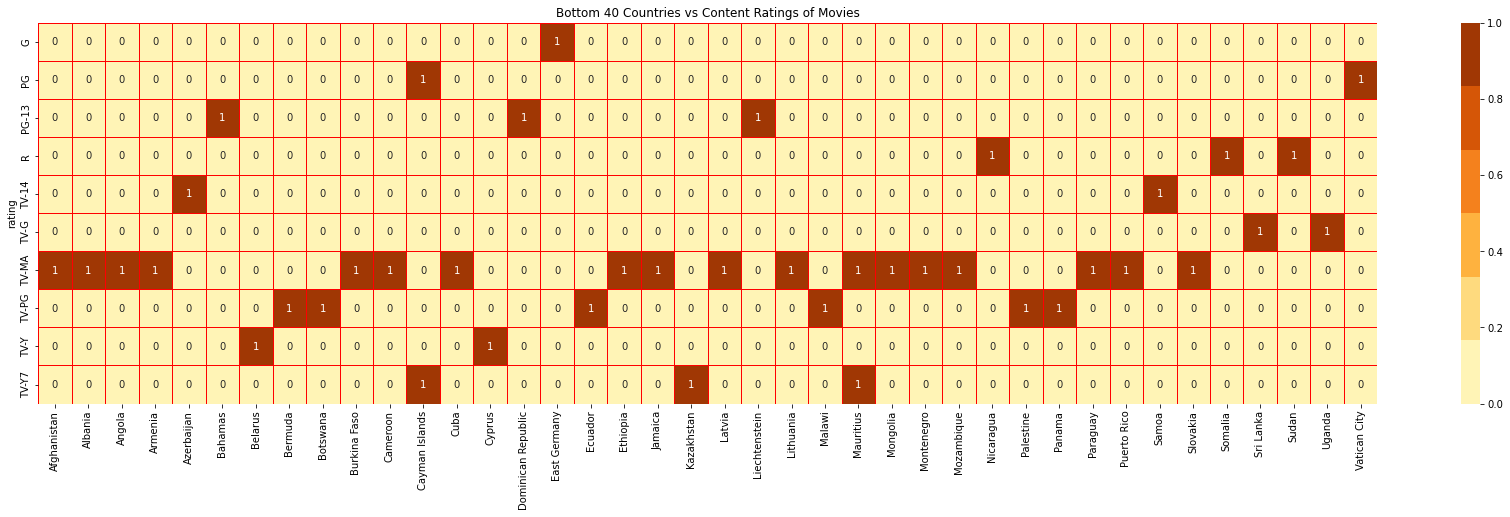

In [53]:
# Creating a Heatmap of Bottom 40 Country with most content on Netflix vs Count of Rating

colormap = sns.color_palette("YlOrBr")
plt.figure(figsize=(30,7))
plt.title('Bottom 40 Countries vs Content Ratings of Movies')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='red', cmap = colormap)

# Recommendation :
If Netflix is planning to expand in a country with limited or no presence, it should stick to content for a mature audience as we can see TV-MA rating is entertained to most of the low interest countries as shown in the graph above.